In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
# pd.crosstab adds "All" row and column which contains sum across rows and columns respectively
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

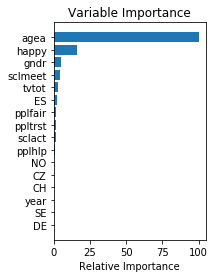


Column headers

 Index(['year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet',
       'sclact', 'gndr', 'agea', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'],
      dtype='object')

 Feature Importance [2.71890335e-01 3.02834394e+00 1.41563197e+00 1.70062970e+00
 1.23081586e+00 1.65003969e+01 4.19985737e+00 1.38296692e+00
 5.11455767e+00 1.00000000e+02 3.53376125e-01 5.32876443e-01
 7.26661658e-02 2.03124575e+00 5.55385134e-01 2.19070105e-01]

argsorted from smallest to largest

 [12 15  0 10 11 14  4  7  2  3 13  1  6  8  5  9]

Column headers

 Index(['DE', 'SE', 'year', 'CH', 'CZ', 'NO', 'pplhlp', 'sclact', 'ppltrst',
       'pplfair', 'ES', 'tvtot', 'sclmeet', 'gndr', 'happy', 'agea'],
      dtype='object')

Rearranged accordingly

 [7.26661658e-02 2.19070105e-01 2.71890335e-01 3.53376125e-01
 5.32876443e-01 5.55385134e-01 1.23081586e+00 1.38296692e+00
 1.41563197e+00 1.70062970e+00 2.03124575e+00 3.02834394e+00
 4.19985737e+00 5.11455767e+00 1.65003969e+01 1.00000000e+02]

Po

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
# argsort sorts from smallest to largest
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# use only one column of a 1 x 2 figure
plt.subplot(1, 2, 2)
# pos is the postion of the bars on the y axis
# feature_importance[sorted_idx] is the width of the bars
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
print("\nColumn headers\n\n",X.columns)
print("\n Feature Importance", feature_importance)
print("\nargsorted from smallest to largest\n\n",sorted_idx)
print("\nColumn headers\n\n",X.columns[sorted_idx])
print("\nRearranged accordingly\n\n",feature_importance[sorted_idx])
print("\nPosition on the y axis\n\n", pos)

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

Before the fun read this:

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

#### Create new features

In [5]:
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
df['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
df.drop(['ppltrst','pplfair','pplhlp'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split

# recreate X
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, shuffle=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=20, shuffle=True)

# # Create training and test sets.
# offset = int(X.shape[0] * 0.9)

# # Put 90% of the data in the training set.
# X_train, y_train = X[:offset], y[:offset]

# # And put 10% in the test set.
# X_test, y_test = X[offset:], y[offset:]

#### Hyperparameter Search

In [6]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
import time
def hyperparameter_search(hyperparameters):
    hyperparameter_combinations = ParameterGrid(hyperparameters)
    scores = []
    start_time = time.time()
    best_model = None
    for params in hyperparameter_combinations:
        clf = ensemble.GradientBoostingClassifier(**params)
        clf.fit(X_train, y_train)
        train_error = 1 - clf.score(X_train, y_train)
        test_error =  1 - clf.score(X_test, y_test)
        scores.append([params, train_error, test_error])
        best_model = clf
    print(time.time() - start_time, " seconds")
    scores = np.array(scores)
    # best estimator
    print("best parameters: ", scores[np.argmin(scores[:, 2]), 0])
    print("lowest test error:", scores[np.argmin(scores[:, 2]), 2], "with train error: ", np.argmin(scores[:, 2]), 1)
    return best_model

In [7]:
hyperparameters = {'n_estimators':np.arange(100,600,50), 
                   'learning_rate':[0.125],
                   'subsample':[0.8],
                  'max_depth':[2,3,4]}
hyperparameter_search(hyperparameters) 

55.3825466632843  seconds
best parameters:  {'learning_rate': 0.125, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
lowest test error: 0.23803680981595088 with train error:  11 1


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.125, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=550,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [8]:
hyperparameters = {'n_estimators':[100], 
                   'learning_rate':[0.125],
                   'subsample':[0.8],
                  'max_depth':[3,4],
                   'min_samples_leaf':[50,60,70,80,90,100],
                    'loss':['deviance']
                  }
hyperparameter_search(hyperparameters) 

7.825634479522705  seconds
best parameters:  {'learning_rate': 0.125, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 90, 'n_estimators': 100, 'subsample': 0.8}
lowest test error: 0.22822085889570554 with train error:  10 1


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.125, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [9]:
hyperparameters = {'n_estimators':[100,110,120,130,140,145,160], 
                   'learning_rate':[0.1, 0.125,0.15, 0.175, 0.2],
                   'subsample':[0.8],
                  'max_depth':[3,4],
                   'min_samples_leaf':[90],
                    'loss':['deviance']
                  }
best_model = hyperparameter_search(hyperparameters) 

58.04666590690613  seconds
best parameters:  {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 90, 'n_estimators': 130, 'subsample': 0.8}
lowest test error: 0.22453987730061353 with train error:  59 1


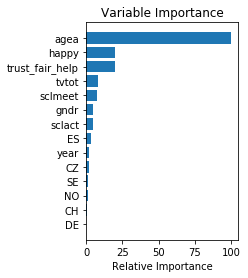


Column headers

 Index(['year', 'tvtot', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea',
       'trust_fair_help', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'],
      dtype='object')

 Feature Importance [  1.70591485   8.21229753  19.90252014   7.34910683   4.56800915
   5.04279684 100.          19.74213925   0.50934269   1.67477425
   0.           3.54671415   1.01814931   1.17155457]

argsorted from smallest to largest

 [10  8 12 13  9  0 11  4  5  3  1  7  2  6]

Column headers

 Index(['DE', 'CH', 'NO', 'SE', 'CZ', 'year', 'ES', 'sclact', 'gndr', 'sclmeet',
       'tvtot', 'trust_fair_help', 'happy', 'agea'],
      dtype='object')

Rearranged accordingly

 [  0.           0.50934269   1.01814931   1.17155457   1.67477425
   1.70591485   3.54671415   4.56800915   5.04279684   7.34910683
   8.21229753  19.74213925  19.90252014 100.        ]

Position on the y axis

 [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5]


In [10]:
feature_importance = best_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
# argsort sorts from smallest to largest
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# use only one column of a 1 x 2 figure
plt.subplot(1, 2, 2)
# pos is the postion of the bars on the y axis
# feature_importance[sorted_idx] is the width of the bars
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
print("\nColumn headers\n\n",X.columns)
print("\n Feature Importance", feature_importance)
print("\nargsorted from smallest to largest\n\n",sorted_idx)
print("\nColumn headers\n\n",X.columns[sorted_idx])
print("\nRearranged accordingly\n\n",feature_importance[sorted_idx])
print("\nPosition on the y axis\n\n", pos)

#### I was able to reduce the test-error from 0.25 to 0.22